## Final Project Submission
​
Please fill out:
* Student name: Marc Musiol
​

# Importing Python Libraries

In [1]:
# Packages used:
import numpy as np 
import pandas as pd 
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shapefile as shp

# Import Data Set

In [2]:
df = pd.read_csv('King_County_House_prices_dataset.csv', delimiter=',',parse_dates=[1])

# 01) Business Understanding 
### What is inside the Data Set?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

In [4]:
# unique elements columns
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [5]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [6]:
# Text at the end of the data set?
df.tail(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Columns


### Useful:
- price: house price
- bedrooms: of bedrooms/house
- bathrooms: of bathrooms/bedrooms
- sqft_living: Square footage of the home
- sqft_lot: Square footage of the lot
- floors: Total floors (levels) in house
- waterfront: House which has a view of a waterfront
- condition: Condition of the home
- grade: Overall grade based on King County grading system
- yr_built: Year the house was built
- yr_renovated: Year the house was renovated
- zipcode: Zipcode of the house location

### Remove (maybe later):
- id: unique id by object, some have more than one entry
- date: Date house was sold (2014-05-02 - 2015-05-27)
- view: Has been viewed
- sqft_above: Square footage of house apart from basement
- sqft_basement: Square footage of basement
- lat: Latitude coordinate of house location
- long: Longitude coordinate of house location
- sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors or something else???
- sqft_lot15: The square footage of the land lots of the nearest 15 neighbors or something else???

In [8]:
df.id.value_counts()[:3]

795000620     3
1825069031    2
2019200220    2
Name: id, dtype: int64

In [9]:
# id > 1 = sold more than once
df.loc[df['id'] == 795000620,:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


# 02) Data Mining
## Remove useles columns

In [10]:
df = df.drop(['id', 'date', 'view', 'sqft_above', 'sqft_basement',  \
              'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)

In [11]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode'],
      dtype='object')

# 03) Data Cleaning

## Dealing with NaN

In [12]:
# we alredy know that waterfront and yr_built have a lot NaN
df[df.isna().any(axis=1)].head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,0.0,98178
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,NaN,98028
10,662500.0,3,2.50,3560,9796,1.0,NaN,3,8,1965,0.0,98007
12,310000.0,3,1.00,1430,19901,1.5,0.0,4,7,1927,NaN,98028
23,252700.0,2,1.50,1070,9643,1.0,NaN,3,7,1985,NaN,98030
26,937000.0,3,1.75,2450,2691,2.0,0.0,3,8,1915,NaN,98119
28,438000.0,3,1.75,1520,6380,1.0,0.0,3,7,1948,NaN,98115
40,625000.0,4,2.50,2570,5520,2.0,NaN,3,9,2000,NaN,98074
45,488000.0,3,2.50,3160,13603,2.0,0.0,3,8,2003,NaN,98019
52,600000.0,3,1.75,1410,4080,1.0,0.0,4,7,1950,NaN,98117


In [13]:
df.groupby('waterfront').count()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode
waterfront,,,,,,,,,,,
0.0,19075,19075,19075,19075,19075,19075,19075,19075,19075,15688,19075
1.0,146,146,146,146,146,146,146,146,146,121,146


In [14]:
df.groupby('yr_renovated').count().tail(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
yr_renovated,,,,,,,,,,,
2011.0,9,9,9,9,9,9,7,9,9,9,9
2012.0,8,8,8,8,8,8,7,8,8,8,8
2013.0,31,31,31,31,31,31,29,31,31,31,31
2014.0,73,73,73,73,73,73,64,73,73,73,73
2015.0,14,14,14,14,14,14,13,14,14,14,14


## Remove 'waterfront' and fill NaN  in 'yr_renovated'

In [15]:
# waterfront may used for future projects only 146 objects in data set
df = df.drop(['waterfront'], axis=1)

In [16]:
df = df.fillna(0)

In [17]:
# NaN's eliminated
df[df.isna().any(axis=1)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
price           21597 non-null float64
bedrooms        21597 non-null int64
bathrooms       21597 non-null float64
sqft_living     21597 non-null int64
sqft_lot        21597 non-null int64
floors          21597 non-null float64
condition       21597 non-null int64
grade           21597 non-null int64
yr_built        21597 non-null int64
yr_renovated    21597 non-null float64
zipcode         21597 non-null int64
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


## Outlier

### Identify outlier

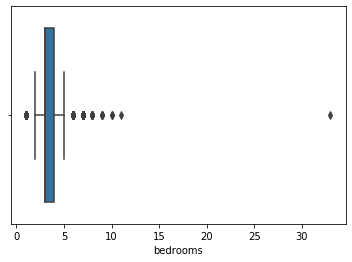

In [19]:
# Bedrooms 1-5 looks normal
ax = sns.boxplot(x=df["bedrooms"])

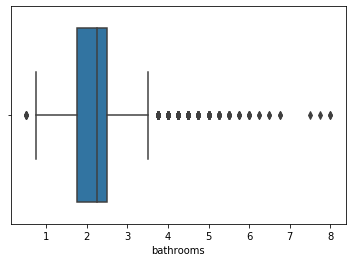

In [20]:
# Bathrooms 1-3.5 looks normal
ax = sns.boxplot(x=df["bathrooms"])

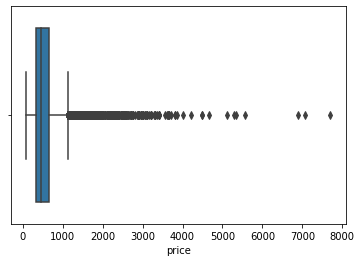

In [21]:
# price in t easier to read
ax = sns.boxplot(x=df["price"]/1000)

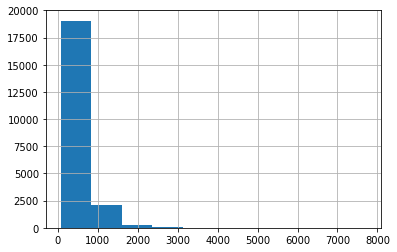

In [22]:
# Let's focus on objects under 1.5 million
(df["price"]/1000).hist();

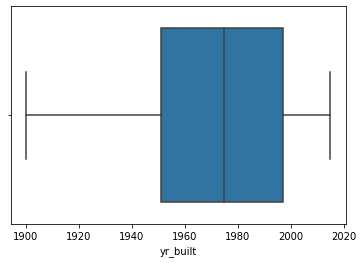

In [23]:
# no outliers in yr_built
ax = sns.boxplot(x=df["yr_built"])

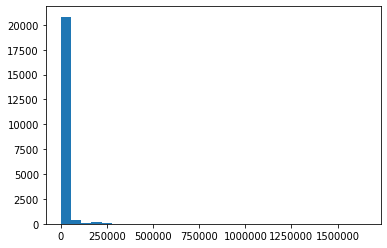

In [24]:
# We are specialized on buildings and not in building areas lot < 100000
plt.hist(df.sqft_lot, bins=30, histtype='stepfilled');

### Delet outlier

In [25]:
df = df[df.bedrooms <= 5]
df = df[df.bathrooms <= 3.5]
df = df[df.bathrooms >= 1]
df = df[df.price <= 1500000]
df = df[df.sqft_lot <= 100000]

In [26]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode
count,2.000800e+04,20008.000000,20008.000000,20008.000000,20008.00000,20008.000000,20008.000000,20008.000000,20008.000000,20008.000000,20008.000000
mean,4.913013e+05,3.300530,2.039109,1971.514094,10069.42613,1.478259,3.410786,7.559126,1970.670882,61.748551,98079.129498
std,2.397461e+05,0.812321,0.674424,765.490603,11121.00806,0.538424,0.648606,1.054141,29.282889,345.608680,53.632685
min,7.800000e+04,1.000000,1.000000,390.000000,520.00000,1.000000,1.000000,4.000000,1900.000000,0.000000,98001.000000
25%,3.150000e+05,3.000000,1.500000,1400.000000,5000.00000,1.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000
50%,4.390000e+05,3.000000,2.000000,1850.000000,7440.00000,1.000000,3.000000,7.000000,1974.000000,0.000000,98070.000000
75%,6.100000e+05,4.000000,2.500000,2430.000000,10100.00000,2.000000,4.000000,8.000000,1996.000000,0.000000,98118.000000
max,1.500000e+06,5.000000,3.500000,7350.000000,99916.00000,3.500000,5.000000,12.000000,2015.000000,2015.000000,98199.000000


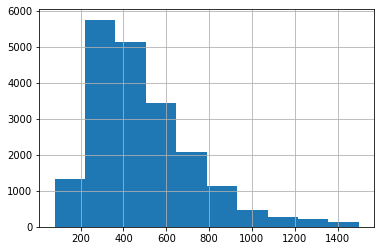

In [27]:
(df["price"]/1000).hist();

In [28]:
df.bathrooms.value_counts()

2.50    5176
1.00    3804
1.75    2965
2.25    1962
2.00    1859
1.50    1418
2.75    1092
3.00     641
3.50     610
3.25     472
1.25       9
Name: bathrooms, dtype: int64

# 04) Data Exploration

### Getting an overview

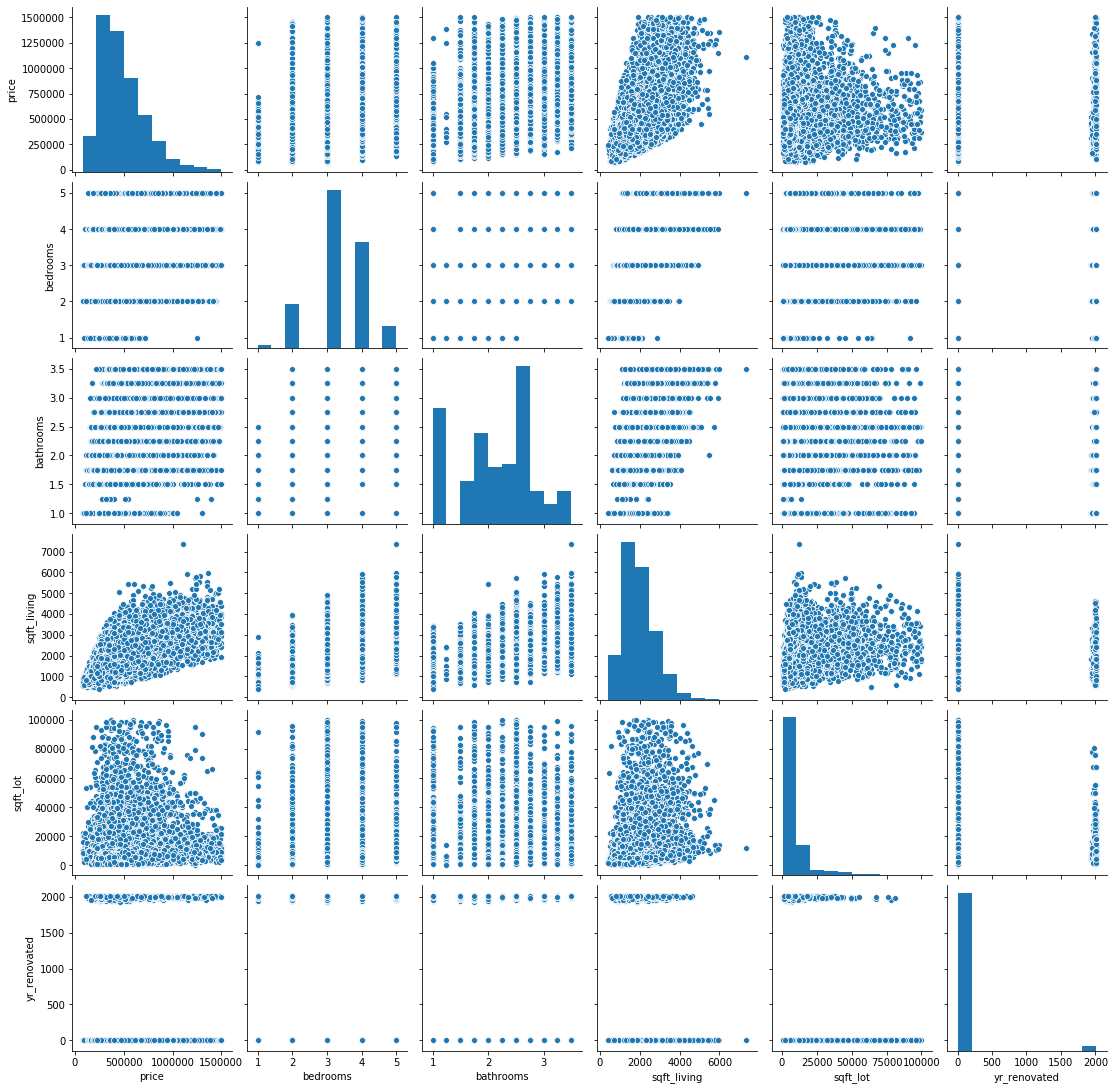

In [29]:
# Splitting the data set
df1 = df.drop(['floors', 'condition', 'grade', 'yr_built', 'zipcode'], axis=1)
df2 = df.drop(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_renovated'], axis=1)

sns.pairplot(df1);

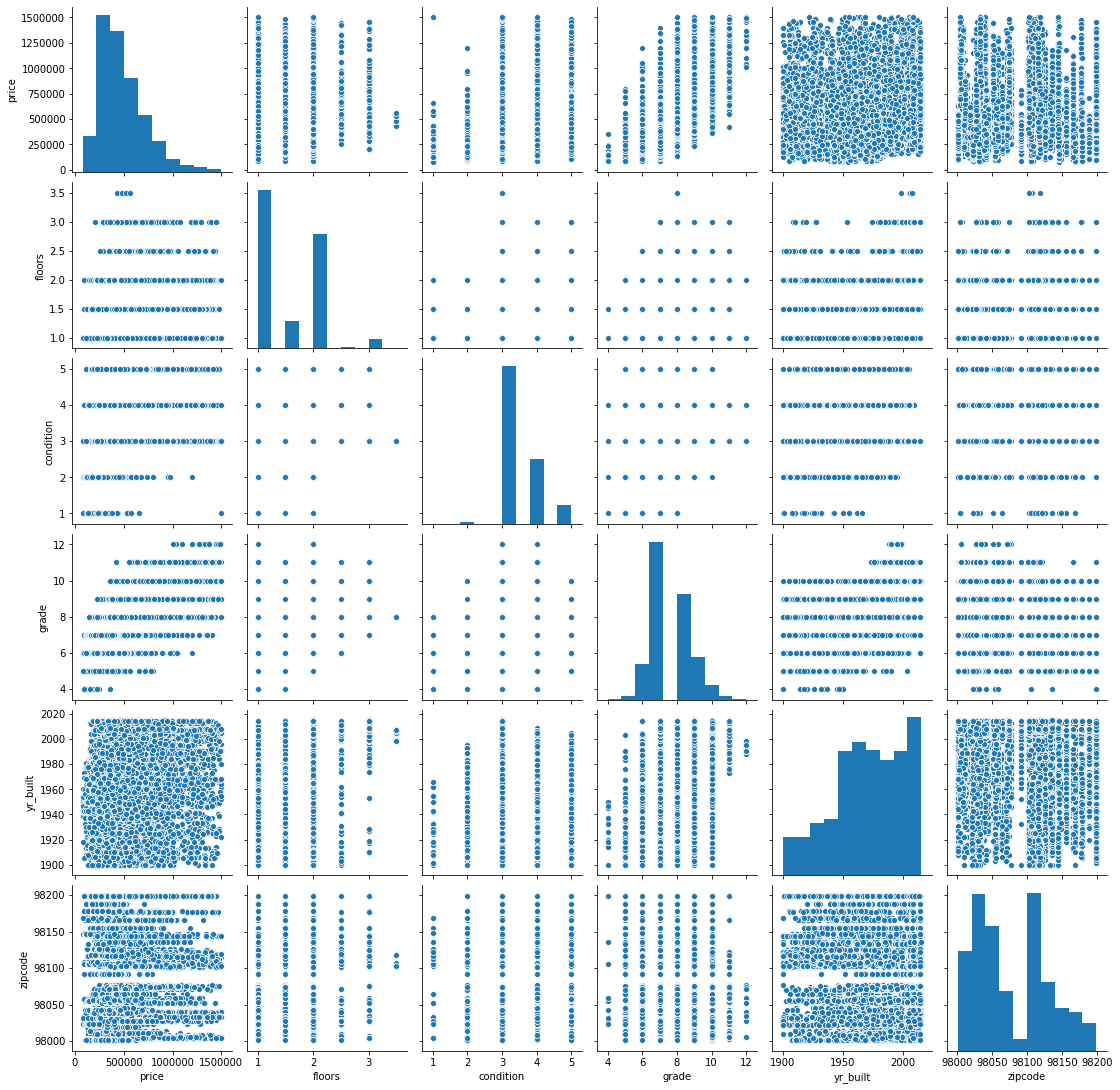

In [30]:
sns.pairplot(df2);

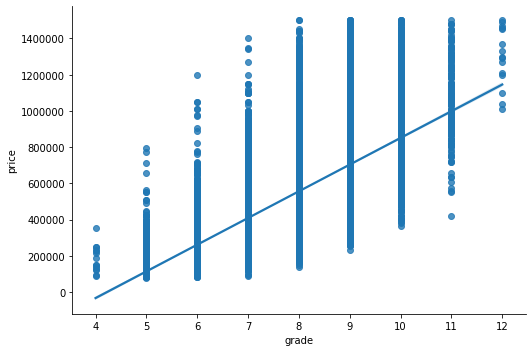

In [31]:
# grade
sns.lmplot('grade', 'price', data=df, aspect=1.5);

## Correlation Heatmap with seaborn

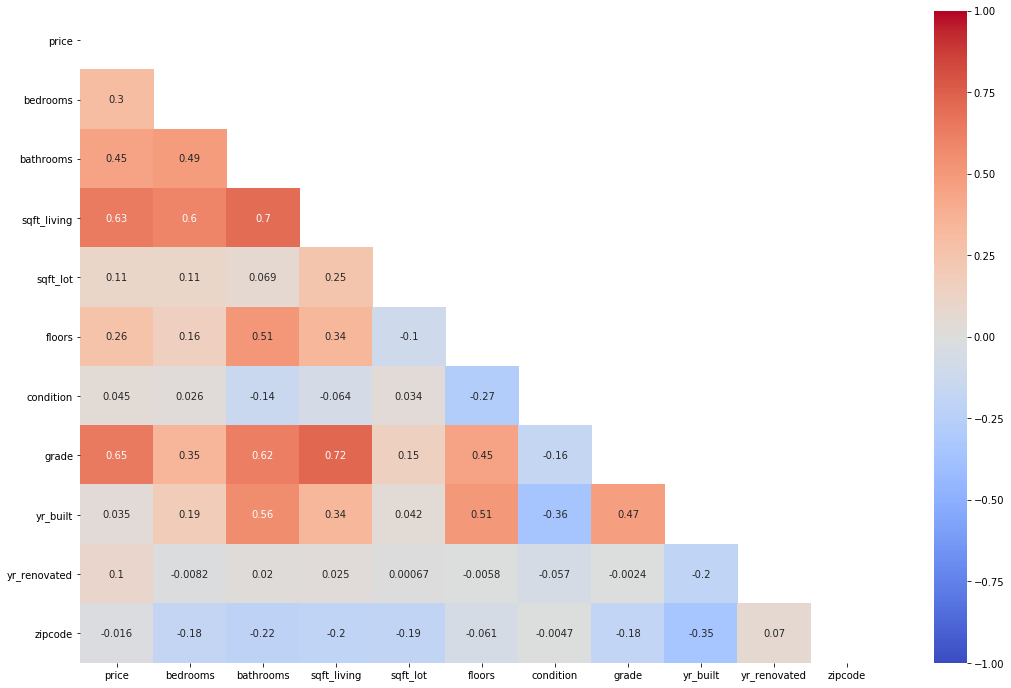

In [32]:
plt.figure(figsize = (18,12))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix);

## Interesting Informations

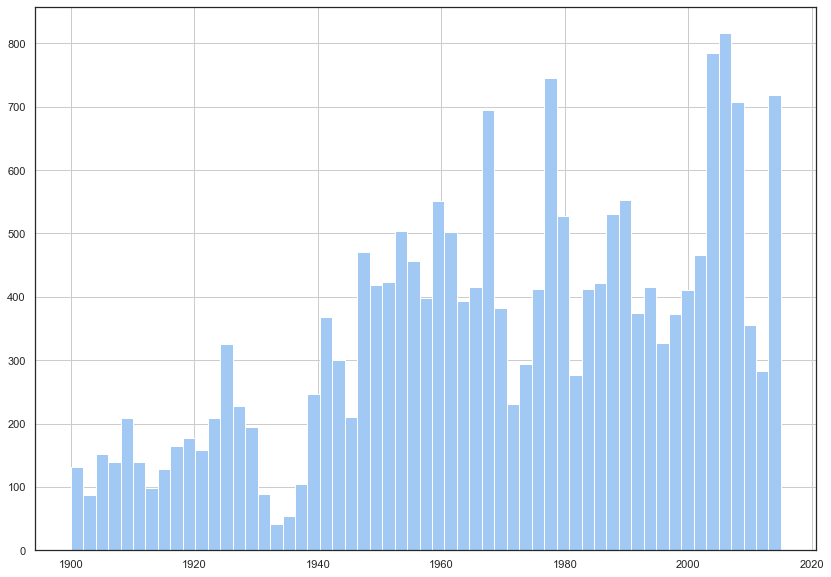

In [33]:
# economic and financial crisis 
sns.set(style='white', palette='pastel', color_codes=True,)
plt.figure(figsize = (14,10))
df.yr_built.hist(bins=57);
plt.savefig('hist_yr_built', dpi=300)

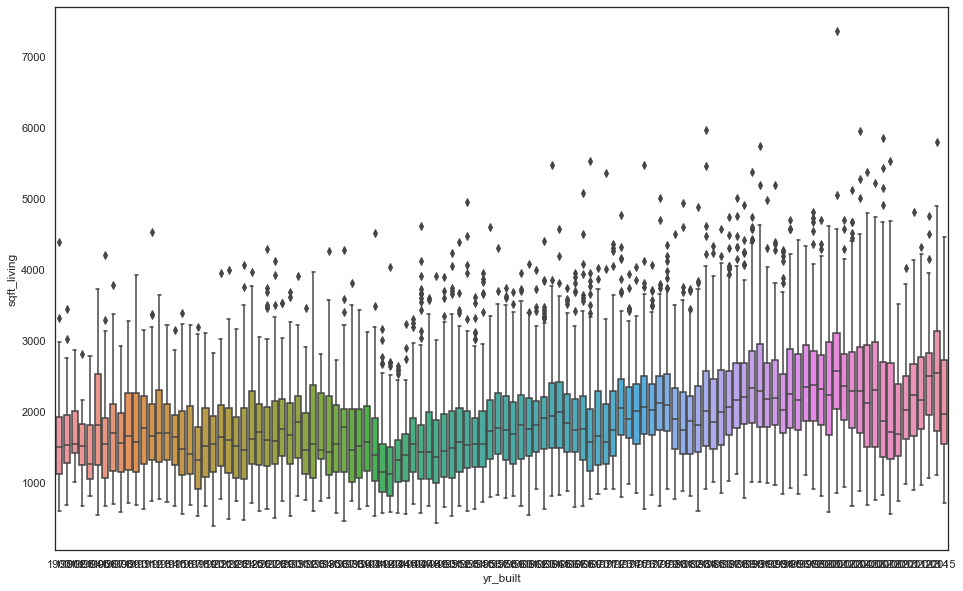

In [34]:
plt.figure(figsize = (16,10))
ax = sns.boxplot(x='yr_built', y="sqft_living", data=df,)
plt.savefig('size_per_year_boxp', dpi=300)

# 05) Feature Engineering

### av_sqft_liv_zip = Average sqft_living price by zipcode

In [35]:
# price per sqft_living
df['price_sqft_liv'] = df['price'] / df['sqft_living']
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode,price_sqft_liv
0,221900.0,3,1.00,1180,5650,1.0,3,7,1955,0.0,98178,188.050847
1,538000.0,3,2.25,2570,7242,2.0,3,7,1951,1991.0,98125,209.338521
2,180000.0,2,1.00,770,10000,1.0,3,6,1933,0.0,98028,233.766234
3,604000.0,4,3.00,1960,5000,1.0,5,7,1965,0.0,98136,308.163265
4,510000.0,3,2.00,1680,8080,1.0,3,8,1987,0.0,98074,303.571429


In [36]:
# apply av_sqft_liv_zip 
mapper = df.groupby("zipcode")['price_sqft_liv'].mean().to_dict()
df['av_sqft_liv_zip'] = [mapper[i] for i in df['zipcode']]
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode,price_sqft_liv,av_sqft_liv_zip
0,221900.0,3,1.00,1180,5650,1.0,3,7,1955,0.0,98178,188.050847,188.307587
1,538000.0,3,2.25,2570,7242,2.0,3,7,1951,1991.0,98125,209.338521,282.847286
2,180000.0,2,1.00,770,10000,1.0,3,6,1933,0.0,98028,233.766234,223.945899
3,604000.0,4,3.00,1960,5000,1.0,5,7,1965,0.0,98136,308.163265,334.255864
4,510000.0,3,2.00,1680,8080,1.0,3,8,1987,0.0,98074,303.571429,260.395451


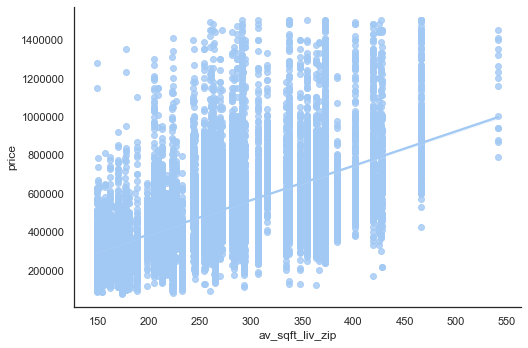

In [37]:
# strong correlation
sns.lmplot('av_sqft_liv_zip', 'price', data=df, aspect=1.5);

In [38]:
df['lot_liv_rat'] = df['sqft_lot'] / df['sqft_living']

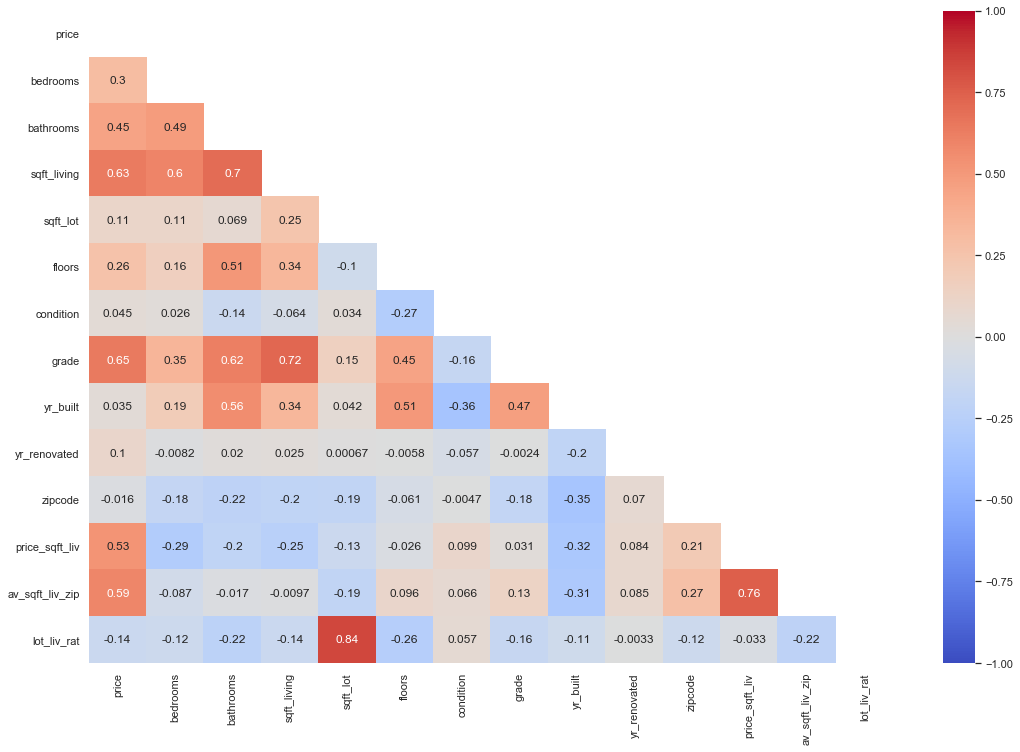

In [39]:
plt.figure(figsize = (18,12))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix);

# 06) Predictive Modelling

In [40]:
#model = 'price ~ sqft_living + av_sqft_liv_zip + grade + condition + lot_liv_rat'
model = 'price ~ sqft_living + av_sqft_liv_zip'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                 3.080e+04
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:24:39   Log-Likelihood:            -2.6217e+05
No. Observations:               20008   AIC:                         5.243e+05
Df Residuals:                   20005   BIC:                         5.244e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.735e+05   3628.098   -102.960      0.000   -3.81e+05   -3.66e+05
sqft_living       200.6538      1.096    183.018      0.000     198.505     202.803
av_sqft_liv_zip  1810.0037     10.683    169.427      0.000    1789.064    1830.943
==============================================================================
Omnibus:                     4598.082   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23633.316
Skew:                           1.017   Prob(JB):                         0.00
Kurtosis:                       7.921   Cond. No.                     9.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Test

In [41]:
# split the data set
train_data, test_data = train_test_split(df, train_size=0.8, random_state=3)
print('The train data comprises {} rows.'.format(train_data.shape[0]))
print('The test data comprises {} rows.'.format(test_data.shape[0]))

The train data comprises 16006 rows.
The test data comprises 4002 rows.


In [42]:
# trying different combinations

# X = train_data[['sqft_living', 'av_sqft_liv_zip', 'grade', 'condition', 'lot_liv_rat']]
X = train_data[['sqft_living', 'av_sqft_liv_zip']]
X = sm.add_constant(X)
y = train_data.price
model = sm.OLS(y, X).fit()
model.summary()

/Users/marcmusiol/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                 2.452e+04
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:24:39   Log-Likelihood:            -2.0980e+05
No. Observations:               16006   AIC:                         4.196e+05
Df Residuals:                   16003   BIC:                         4.196e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.756e+05   4082.580    -92.000      0.000   -3.84e+05   -3.68e+05
sqft_living       201.3819      1.229    163.886      0.000     198.973     203.790
av_sqft_liv_zip  1813.6756     12.011    151.003      0.000    1790.133    1837.218
==============================================================================
Omnibus:                     3670.078   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18709.107
Skew:                           1.016   Prob(JB):                         0.00
Kurtosis:                       7.891   Cond. No.                     9.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#X_test = test_data[['sqft_living', 'av_sqft_liv_zip', 'grade', 'condition', 'lot_liv_rat']]
X_test = test_data[['sqft_living', 'av_sqft_liv_zip']]
X_test = sm.add_constant(X_test)
y_test = test_data.price

In [44]:
test_data.sqft_living
pred_prices = model.get_prediction(X_test)
error = abs(pred_prices.predicted_mean - y_test)/y_test
error.mean()

0.18816662841543239

### Slightly better results with more input. 
### The simple solution is easier to handle in the busines case

### ['sqft_living', 'av_sqft_liv_zip'] error.mean = 0.18816662841543239

['sqft_living', 'av_sqft_liv_zip', 'grade'] error.mean = 0.1774150466228611

['sqft_living', 'av_sqft_liv_zip', 'grade', 'condition'] error.mean = 0.17463353671721696

['sqft_living', 'av_sqft_liv_zip', 'grade', 'condition', 'lot_liv_rat'] error.mean = 0.171668831651371

# 07) Data Visualization
## create a map with zipcodes 

In [45]:
# https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f
# thx to Marcelo Rovai and Karsten

In [46]:
sns.set(style='white', palette='pastel', color_codes=True,)
sns.mpl.rc('figure', figsize=(10,6))

In [47]:
shp_path = './KG_map_zipcode/Zipcodes_for_King_County_and_Surrounding_Area_Shorelines__zipcode_shore_area.shp'
sf = shp.Reader(shp_path)

In [48]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df_map = pd.DataFrame(columns=fields, data=records)
    df_map = df_map.assign(coords=shps)
    return df_map

In [49]:
df_map = read_shapefile(sf)

In [50]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [51]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [52]:
# creating list grouped by zipcode using mean price per sqft_living
df_price_sqft = df.groupby('zipcode').mean()
df_price_sqft = df_price_sqft.price_sqft_liv
df_price_sqft = list(df_price_sqft)

In [53]:
def calc_color(data, color=None):
        if color   == 1: 
            color_sq = ['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            
            color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"'Category '+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n  C1  C2  C3  C4  C5  C6")    
        return color_ton, bins;


Category 1: 149 => 170 
Category 2: 171 => 212 
Category 3: 213 => 248 
Category 4: 249 => 284 
Category 5: 285 => 363 
Category 6: 364 => 540 

  C1  C2  C3  C4  C5  C6


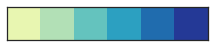

In [54]:
# filling bins with avg. prices
color_ton, bins = calc_color(df_price_sqft, 2)
plt.savefig('legend', dpi=300)

In [55]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            #plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [56]:
zip_of_all = sorted(list(df.zipcode.unique()))
id_of_all=[]
for elm in zip_of_all:
    for idx, elm2 in enumerate(sf.records()):
        if elm2[1] == elm:
            id_of_all.append(elm2[0])
            break

<Figure size 792x648 with 0 Axes>

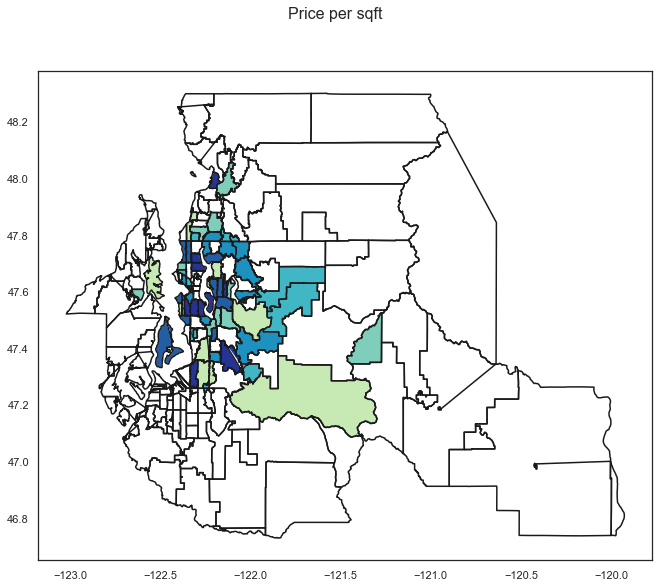

In [57]:
plot_map_fill_multiples_ids_tone(sf, 'Price per sqft', id_of_all, True, color_ton, bins);
plt.savefig('KC_zip_map', dpi=300)

# 07) Future work

- Use lat and long to create price per sqft_liv15
- Analyse impact of 'waterfront' and 'yr_renovated'
- Before removing 'id' use information to fill NAN, if there are multiply ids with missing cells
- Save output test modelling 
- Analyse impact of renovation on older buildings